# MLP 다중 퍼셉트론

활성화 함수 - 기본 Relu > 0이하를 잘라서 0으로 / 이상은 무한대로 선형증가

- w가중치 은닉층과 y^사이 가중치는 v

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

## MLPClassifier

- 기본 히든 레이어 100
- activation = 'relu'  / tanh, ...
- solver='adam'
- alpha = 0.0001  #규제  / L2사용


- solver?
- lbfgs(작은 데이터셋), adam(큰 데이터셋)

In [2]:
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X,y = make_moons(n_samples=100, random_state=42, noise=0.3)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

훈련 세트 정확도  :1.000
테스트 세트 정확도  :0.840


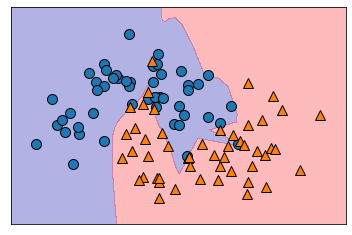

In [3]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(100,)).fit(X_train, y_train)

print("훈련 세트 정확도  :{:.3f}".format(accuracy_score(y_train, mlp.predict(X_train))))
print("테스트 세트 정확도  :{:.3f}".format(accuracy_score(y_test, mlp.predict(X_test))))

mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3)


데이터에 비해서 히든 유닛이 많아서 과적합된 결과가 나옴!

유닛 100개에 하나의 층

훈련 세트 정확도  :0.880
테스트 세트 정확도  :0.880


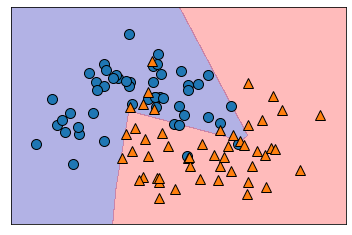

In [4]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(10,)).fit(X_train, y_train)

print("훈련 세트 정확도  :{:.3f}".format(accuracy_score(y_train, mlp.predict(X_train))))
print("테스트 세트 정확도  :{:.3f}".format(accuracy_score(y_test, mlp.predict(X_test))))

mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3)


은닉 유닛 수 10개

- hidden_layer_sizes=(10,)
- 선이 날카로워짐 과대적합 됐던 훈련 세트의 점수가 떨어지고 테스트 세트 정확도가 살짝 오름


훈련 세트 정확도  :1.000
테스트 세트 정확도  :0.920


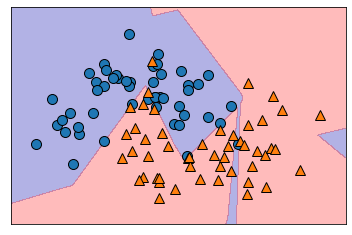

In [7]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                    hidden_layer_sizes=(10,10), max_iter=300).fit(X_train, y_train)

print("훈련 세트 정확도  :{:.3f}".format(accuracy_score(y_train, mlp.predict(X_train))))
print("테스트 세트 정확도  :{:.3f}".format(accuracy_score(y_test, mlp.predict(X_test))))

mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3)


은닉 유닛 수 10개 + 은닉 층 2개

- 다시 과적합 됐음...
- 테스트 세트 정확도도 올랐음.. 
- 모델이 더 복잡해졌지만 테스트 데이터가 잘 맞았나 봄..

훈련 세트 정확도  :1.000
테스트 세트 정확도  :0.880


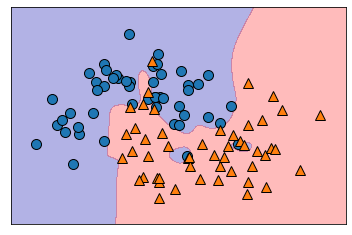

In [8]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, activation = 'tanh'
                   , max_iter=500).fit(X_train, y_train)

print("훈련 세트 정확도  :{:.3f}".format(accuracy_score(y_train
                                                 , mlp.predict(X_train))))
print("테스트 세트 정확도  :{:.3f}".format(accuracy_score(y_test, mlp.predict(X_test))))

mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3)


default 'relu'에서 -> activation = 'tanh'

- 나머지는 default  hidden_layer_sizes = (100, )
-https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier.fit
- 역시 과적합된 결과

훈련 세트 정확도  :1.000
테스트 세트 정확도  :0.840


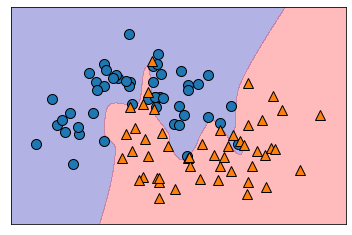

In [37]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, activation = 'logistic'
                    , max_iter=500).fit(X_train, y_train)

print("훈련 세트 정확도  :{:.3f}".format(accuracy_score(y_train, mlp.predict(X_train))))
print("테스트 세트 정확도  :{:.3f}".format(accuracy_score(y_test, mlp.predict(X_test))))

mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3)


relu, logistic - 0.84 / tanh - 0.88

- 거의 유사함

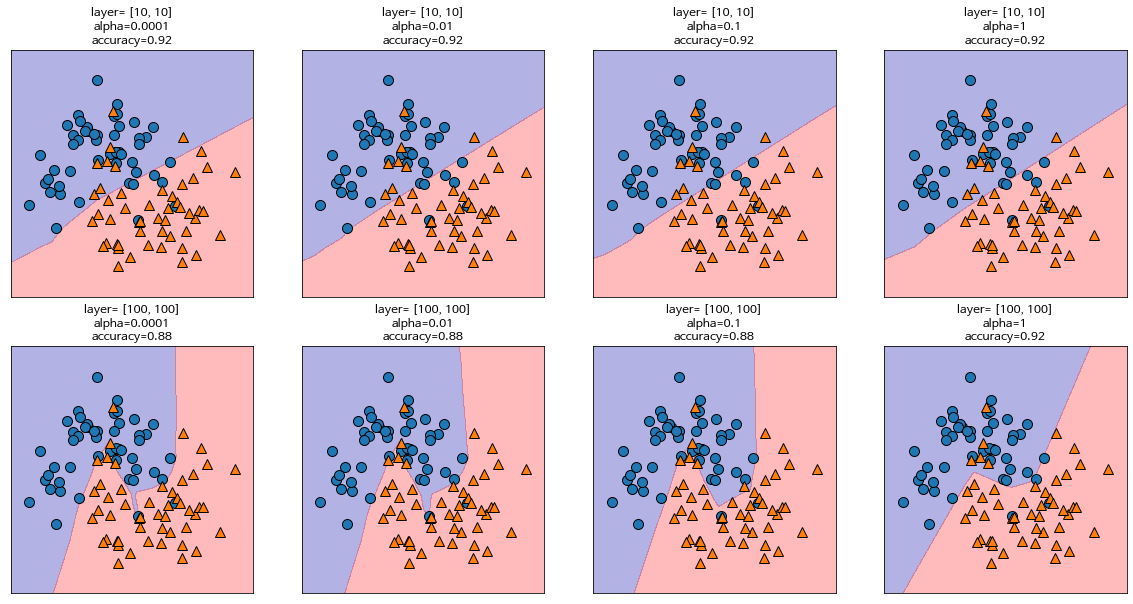

In [47]:
alp = [0.0001,0.01,0.1,1]
layer = [[10,10],[100,100]]

fig, axes= plt.subplots(2,4,figsize=(20,10))

i = 0
ax = axes.ravel()

for l in layer:
    for a in alp:
        mlp = MLPClassifier(random_state=0,
                            alpha=a, hidden_layer_sizes=l, max_iter=2000).fit(X_train, y_train)
        mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax[i])
        mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3, ax=ax[i])
        ax[i].set_title("layer= {}\nalpha={}\naccuracy={}".format(l, a, mlp.score(X_test, y_test)))
        i = i+1


### alpha와 layer size에 따른 결과

- 이 데이터셋은 규제가 강화될수록 성능이 좋다!

훈련 세트 정확도  :1.000
테스트 세트 정확도  :0.960


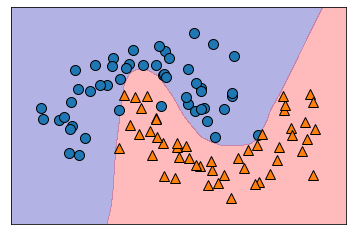

In [5]:
X,y = make_moons(n_samples=100, random_state=0, noise=0.25)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(100,)).fit(X_train, y_train)

print("훈련 세트 정확도  :{:.3f}".format(accuracy_score(y_train, mlp.predict(X_train))))
print("테스트 세트 정확도  :{:.3f}".format(accuracy_score(y_test, mlp.predict(X_test))))

mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3)


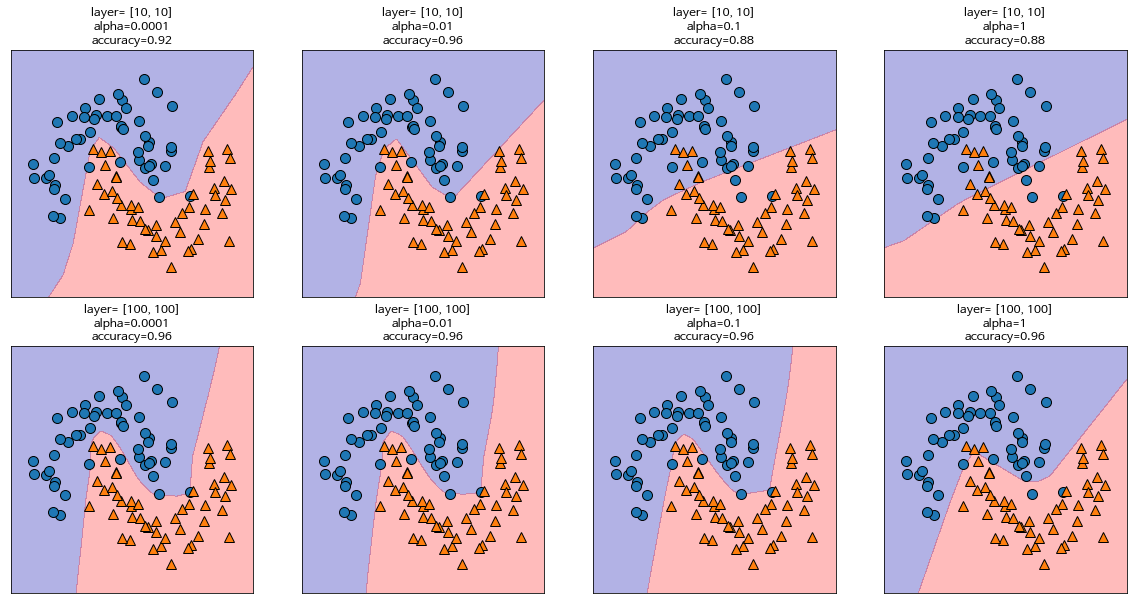

In [11]:

alp = [0.0001,0.01,0.1,1]
layer = [[10,10],[100,100]]

fig, axes= plt.subplots(2,4,figsize=(20,10))

i = 0
ax = axes.ravel()

for l in layer:
    for a in alp:
        mlp = MLPClassifier(random_state=0,
                            alpha=a, hidden_layer_sizes=l, max_iter=2000).fit(X_train, y_train)
        mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax[i])
        mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3, ax=ax[i])
        ax[i].set_title("layer= {}\nalpha={}\naccuracy={}".format(l, a, mlp.score(X_test, y_test)))
        i = i+1


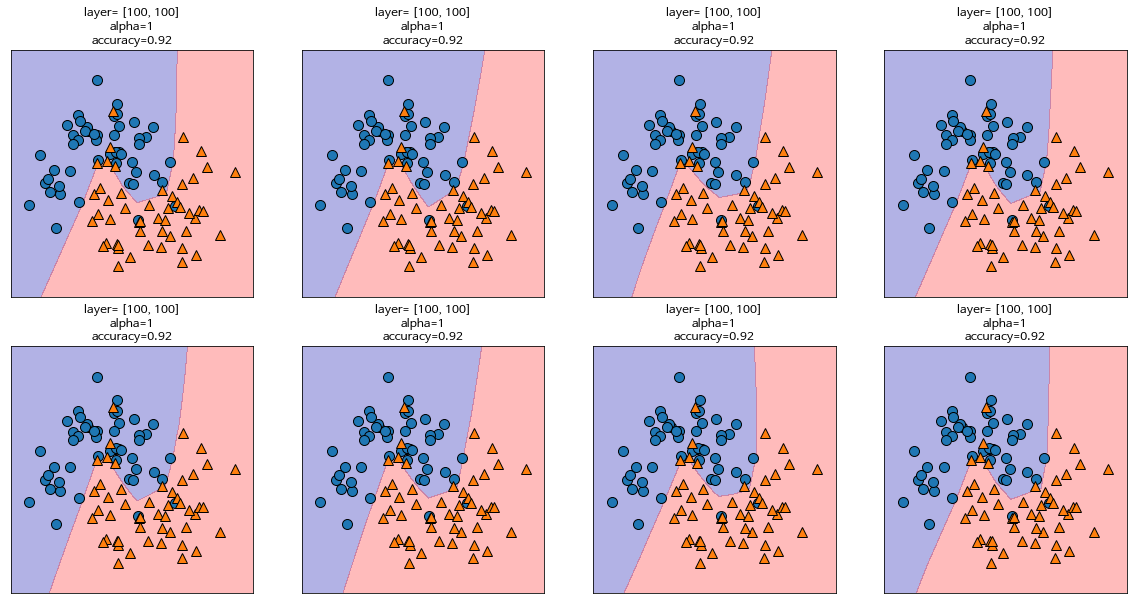

In [49]:
random = [0,1,2,3,4,5,6,7]

fig, axes= plt.subplots(2,4,figsize=(20,10))

i = 0
ax = axes.ravel()

for r in random:
    mlp = MLPClassifier(alpha=0.0001, hidden_layer_sizes=(100,), 
                        max_iter=2000, random_state=r).fit(X_train, y_train)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax[i])
    mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3, ax=ax[i])
    ax[i].set_title("layer= {}\nalpha={}\naccuracy={}".format(l, a, mlp.score(X_test, y_test)))
    i = i+1


mlpclassifier의 random state에 따라서도 그래프를 확인하면 알 수 있듯 결과가 달라진다.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer();
cX_train, cX_test, cy_train, cy_test = train_test_split(cancer.data, cancer.target,                                                  
                                                    random_state=0)

mlp = MLPClassifier(random_state=0).fit(cX_train, cy_train)

print("훈련 세트 정확도  :{:.3f}".format(accuracy_score(cy_train, mlp.predict(cX_train))))
print("테스트 세트 정확도  :{:.3f}".format(accuracy_score(cy_test, mlp.predict(cX_test))))


훈련 세트 정확도  :0.927
테스트 세트 정확도  :0.930


In [9]:
clf1 = LogisticRegression(random_state=0, max_iter=2000)
clf2 = RandomForestClassifier(n_estimators=100, random_state=0)
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier(random_state=0)
clf5 = KNeighborsClassifier(n_neighbors=5)
clf6 = GradientBoostingClassifier(random_state=0)

for clf in (clf1, clf2, clf3, clf4, clf5):
    clf.fit(cX_train, cy_train)
    print(clf.__class__.__name__, '{:.3f} , {:.3f}'.format(accuracy_score(cy_train, clf.predict(cX_train)),
                                                                          accuracy_score(cy_test, clf.predict(cX_test))))



LogisticRegression 0.960 , 0.951
RandomForestClassifier 1.000 , 0.972
GaussianNB 0.951 , 0.937
DecisionTreeClassifier 1.000 , 0.881
KNeighborsClassifier 0.941 , 0.937


mlp가 다른 모델보다 정확도가 떨어짐

> - 표준화가 안 된 문제... SVC도 표준화가 안 되면 더 결과가 안 좋음
> - 데이터 표준화가 필요함! 

### Z-score 표준화

In [12]:
#훈련 세트 각 특성의 평균
mean_on_train = cX_train.mean(axis=0)
#훈련 세트 각 특성의 표준편차
std_on_train =cX_train.std(axis=0)

print(mean_on_train.shape)

#데이터에서 평균을 빼고 표준편차로 나누면
#평균 0, 표준 편차 1인 데이터로 변환됨

X_train_scaled = (cX_train-mean_on_train)/std_on_train
X_test_scaled = (cX_test - mean_on_train)/std_on_train

mlp = MLPClassifier(random_state=0, max_iter=1000).fit(X_train_scaled, cy_train)

print("훈련 세트 정확도  :{:.3f}".format(accuracy_score(cy_train, mlp.predict(X_train_scaled))))
print("테스트 세트 정확도  :{:.3f}".format(accuracy_score(cy_test, mlp.predict(X_test_scaled))))


(30,)
훈련 세트 정확도  :1.000
테스트 세트 정확도  :0.972


#### 표준화 전

- 훈련 세트 정확도  :0.927
- 테스트 세트 정확도  :0.930


#### 표준화 후
- 훈련 세트 정확도  :0.991
- 테스트 세트 정확도  :0.965


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'score')

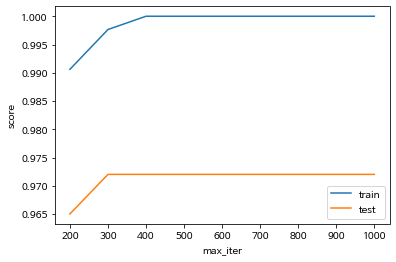

In [64]:
## max_iter

score_train = []
score_test = []
iter = [200,300,400,500,600,700,800,900,1000]

for i in iter:
    mlp = MLPClassifier(random_state=0,max_iter=i).fit(X_train_scaled, cy_train)
    score_train.append(accuracy_score(cy_train, mlp.predict(X_train_scaled)))
    score_test.append(accuracy_score(cy_test, mlp.predict(X_test_scaled)))

plt.plot(iter, score_train, label="train")
plt.plot(iter, score_test, label="test")
plt.legend()
plt.xlabel("max_iter")
plt.ylabel("score")

max_iter 즉 반복수가 늘어나면서 성능이 좀 더 좋아지는 것을 확인할 수 있음


### decision_function / predict_proba

In [19]:
gb = GradientBoostingClassifier(random_state=0).fit(X_train_scaled, cy_train)

print("결정 함수 결과 = ",gb.decision_function(X_train_scaled).shape)
print("확률 값 = ",gb.predict_proba(X_train_scaled).shape)


결정 함수 결과 =  (426,)
확률 값 =  (426, 2)


In [21]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_tes = train_test_split(iris.data, iris.target, random_state=0)

gb = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("결정 함수 결과 = ",gb.decision_function(X_test).shape)
print("확률 값 = ",gb.predict_proba(X_test).shape)


결정 함수 결과 =  (38, 3)
확률 값 =  (38, 3)


정확한 클래스임을 확신하는 정도

- Decision function = 양성에 속한다고 믿는 정도 > 음수면 다른 클래스
- predict_proba 각각의 클래스에 속하는 확률 값